In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('SBI.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df = pd.DataFrame(data = df)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [16]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,0.502674,30.584037,1.045073,0.202445,1.505730,13089.622269,0.586707
std,14.085397,0.500184,5.975320,1.124627,0.401975,1.105037,11738.168486,0.492613
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4686.388700,0.000000
50%,39.000000,1.000000,30.305000,1.000000,0.000000,2.000000,9377.904700,1.000000
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16577.779500,1.000000
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,49577.662400,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1265b458e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1265b462780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1265b458cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1265b462e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1265b462dd8>],
 'means': []}

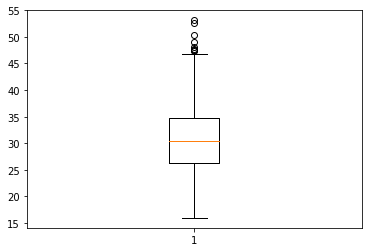

In [9]:
plt.boxplot(df['bmi'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1265b358080>,
 'caps': [<matplotlib.lines.Line2D at 0x1265b3420b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1265b3585f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1265b3429b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1265b2c67f0>],
 'means': []}

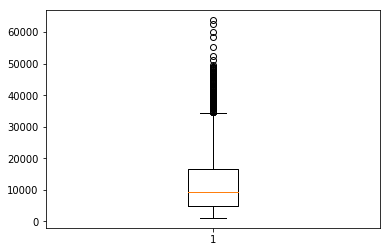

In [10]:
plt.boxplot(df['charges'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1265b2baa58>,
 'caps': [<matplotlib.lines.Line2D at 0x1265b2bad68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1265b2ba668>],
 'medians': [<matplotlib.lines.Line2D at 0x1265b2b77b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1265b2b7b00>],
 'means': []}

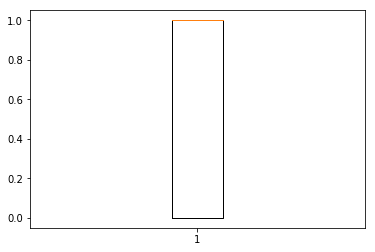

In [11]:
plt.boxplot(df['sex'])

In [17]:
from scipy.stats import zscore
z= np.abs(zscore(df))         # formula for zscore
z

array([[1.43906316, 1.00536197, 0.44935891, ..., 1.35275274, 0.32345355,
        0.83930154],
       [1.5100858 , 0.99466663, 0.53339072, ..., 0.44745962, 0.96849975,
        0.83930154],
       [0.79985933, 0.99466663, 0.40447808, ..., 0.44745962, 0.73635529,
        1.19146689],
       ...,
       [1.5100858 , 1.00536197, 1.04904129, ..., 0.44745962, 0.97665735,
        0.83930154],
       [1.29701786, 1.00536197, 0.80093884, ..., 1.35275274, 0.94443291,
        1.19146689],
       [1.54388803, 1.00536197, 0.25347866, ..., 0.45783349, 1.36800497,
        0.83930154]])

In [18]:
thresholds = 3
df = df[(z<3).all(axis=1)]

In [19]:
df.shape

(1301, 8)

In [ ]:
# I am using zscore and this will eventually elemenates 38 rows from main data..

In [24]:
x = df.iloc[:,0:-1].values
x

array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, ...,
        1.00000000e+00, 3.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, ...,
        0.00000000e+00, 3.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

In [25]:
y = df.iloc[:, -1].values
y


array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [27]:
dfcorr = df.corr()

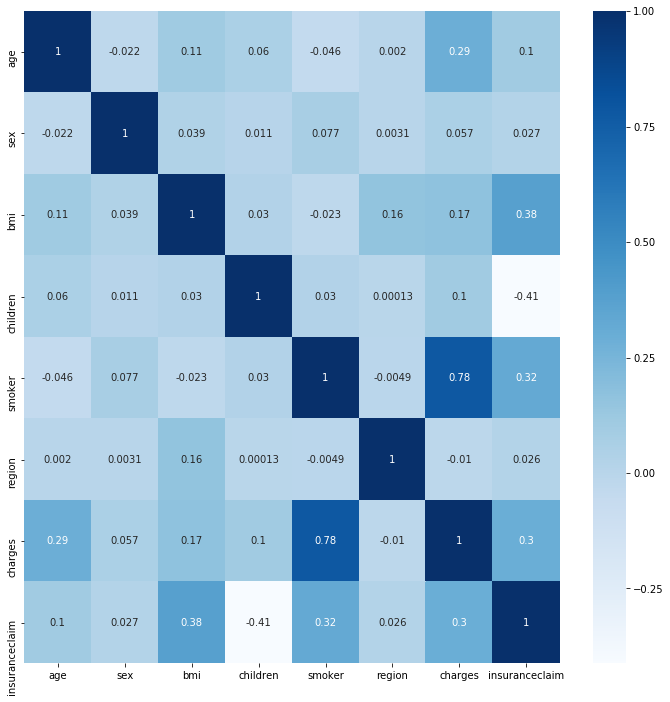

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(dfcorr, cmap="Blues", annot = True)

In [29]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
com = [LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
for c in com:
    c.fit(x_train,y_train)
    print(c, c.score(x_train,y_train))   # score at 0th then 1th, 2th ... position model(Logistic ..gaussianNB,SVC, Decisiontree...)
    pred=c.predict(x_test)
    print("\n accuracy score:", accuracy_score(y_test,pred))
    print("\n confusion matrix:", confusion_matrix(y_test,pred))
    print("\n classification report:", classification_report(y_test,pred))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 0.7772675086107922

 accuracy score: 0.7511627906976744

 confusion matrix: [[ 98  83]
 [ 24 225]]

 classification report:               precision    recall  f1-score   support

           0       0.80      0.54      0.65       181
           1       0.73      0.90      0.81       249

   micro avg       0.75      0.75      0.75       430
   macro avg       0.77      0.72      0.73       430
weighted avg       0.76      0.75      0.74       430

GaussianNB(priors=None, var_smoothing=1e-09) 0.8059701492537313

 accuracy score: 0.7953488372093023

 confusion matrix: [[161  20]
 [ 68 181]]

 classification report:               precision    recall  f1-score   support

           0       0.70      0.89      0.79       181
       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 0.9988518943742825

 accuracy score: 0.6093023255813953

 confusion matrix: [[ 17 164]
 [  4 245]]

 classification report:               precision    recall  f1-score   support

           0       0.81      0.09      0.17       181
           1       0.60      0.98      0.74       249

   micro avg       0.61      0.61      0.61       430
   macro avg       0.70      0.54      0.46       430
weighted avg       0.69      0.61      0.50       430

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_stat

In [35]:
#accuracy score (decision tree) = .97
#accuracy score (GaussianNB)    = .79
#accuracy score (SVC)           = .60
#accuracy score (KNeighbors)    = .60
#accuracy score (decision tree) = .75